# Exercise 6

# Marine Forecast Dataset - Regression Analysis

This notebook presents a regression analysis on the Marine Forecast dataset. The goal is to predict the wind speed based on various weather parameters such as temperature, humidity, wind direction, and pressure. 

## Dataset Description

The dataset used in this analysis contains the following columns:

- Formatted Date: Date and time of the recorded data
- Summary: Weather summary for the given date and time
- Precip Type: Type of precipitation (rain, snow, etc.)
- Temperature (C): Temperature in degrees Celsius
- Apparent Temperature (C): Perceived temperature in degrees Celsius
- Humidity: Relative humidity
- Wind Speed (km/h): Wind speed in kilometers per hour (target variable)
- Wind Bearing (degrees): Wind direction in degrees
- Visibility (km): Visibility in kilometers
- Loud Cover: Indicator for significant noise or loud cover
- Pressure (millibars): Atmospheric pressure in millibars
- Daily Summary: Summary of weather conditions for the day

The objective is to build a regression model that can accurately predict the wind speed based on the provided weather parameters.

## Dataset Source

The dataset can be downloaded from https://www.kaggle.com/datasets/muthuj7/weather-dataset?resource=download&select=weatherHistory.csv

## Table of Contents

1. Data Loading and Initial Exploration
2. Data Preprocessing
3. Regression Modeling
4. Model Evaluation
5. Optimizations

Let's begin the analysis by loading the dataset and performing initial exploration.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### Data Loading and Initial Exploration

       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   


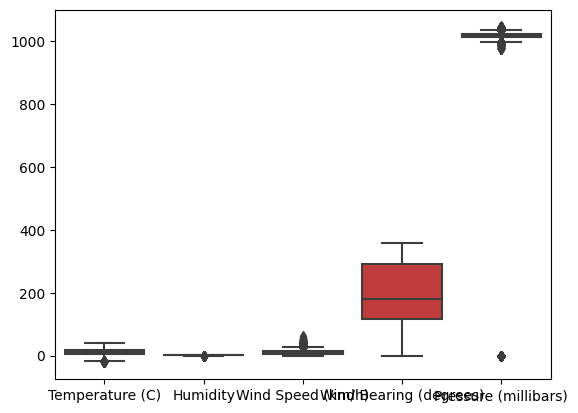

/var/folders/f6/5tt031d554gc0h61458rb9z40000gn/T/ipykernel_10252/573806853.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


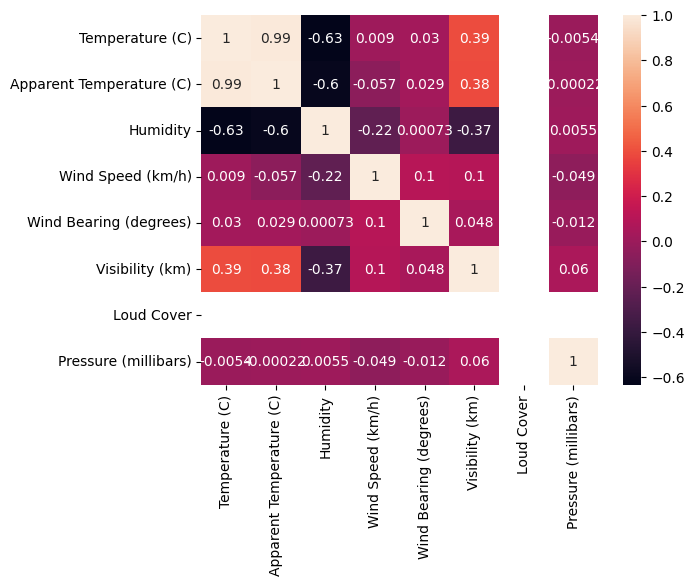

In [2]:
# Load the dataset
data = pd.read_csv('weatherHistory.csv')

# Dataset Analysis

## Descriptive Statistics
print(data.describe())

## visualise the data spread
sns.boxplot(data=data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']])
plt.show()

# Correlation Analysis
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Data Preprocessing

/var/folders/f6/5tt031d554gc0h61458rb9z40000gn/T/ipykernel_10252/647558224.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_outliers_removed = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]


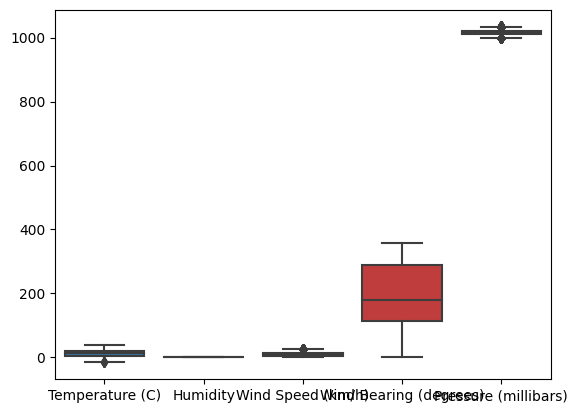

In [3]:
# Outlier Treatment
## Calculate the Interquartile Range (IQR)
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

## Define the Upper and Lower Bounds for Outlier Detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Replace Outliers with NaN
data_outliers_removed = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

## Remove rows with NaN values
data_outliers_removed = data_outliers_removed.dropna()

## Visualize the modified data
sns.boxplot(data=data_outliers_removed[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']])
plt.show()

## Feature Selection
X = data_outliers_removed[['Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Pressure (millibars)']]
y = data_outliers_removed['Wind Speed (km/h)']

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Regression Modeling

We will compare 2 regression algorithm and their MSE when fitting this problem

In [4]:
## Linear Regression
reg_model_linear = LinearRegression()
reg_model_linear.fit(X_train_scaled, y_train)
y_pred_linear = reg_model_linear.predict(X_test_scaled)

## Random Forest Regression
reg_model_rf = RandomForestRegressor()
reg_model_rf.fit(X_train_scaled, y_train)
y_pred_rf = reg_model_rf.predict(X_test_scaled)

### Model Evaluation

In [5]:
## Linear Regression Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

## Random Forest Regression Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R-squared:", r2_linear)
print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R-squared:", r2_rf)

Linear Regression - Mean Squared Error: 28.401639245684486
Linear Regression - R-squared: 0.15890321034334676
Random Forest Regression - Mean Squared Error: 23.742178368461417
Random Forest Regression - R-squared: 0.2968902311438656


### Optimizations

In [7]:
## Cross Validation and Hyperparameter Tuning for Linear Regression
param_grid_linear = {'fit_intercept': [True, False]}
reg_model_linear_cv = GridSearchCV(reg_model_linear, param_grid_linear, cv=5)
reg_model_linear_cv.fit(X_train_scaled, y_train)

## Best Hyperparameters and Score for Linear Regression
best_params_linear = reg_model_linear_cv.best_params_
best_score_linear = reg_model_linear_cv.best_score_

## Cross Validation and Hyperparameter Tuning for Random Forest Regression
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 5]}
reg_model_rf_cv = GridSearchCV(reg_model_rf, param_grid_rf, cv=5)
reg_model_rf_cv.fit(X_train_scaled, y_train)

## Best Hyperparameters and Score for Random Forest Regression
best_params_rf = reg_model_rf_cv.best_params_
best_score_rf = reg_model_rf_cv.best_score_

# Model Evaluation

## Linear Regression Metrics
y_pred_linear = reg_model_linear_cv.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

## Random Forest Regression Metrics
y_pred_rf = reg_model_rf_cv.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression - Best hyperparameters:", best_params_linear)
print("Linear Regression - Best score:", best_score_linear)
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R-squared:", r2_linear)
print("Random Forest Regression - Best hyperparameters:", best_params_rf)
print("Random Forest Regression - Best score:", best_score_rf)
print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R-squared:", r2_rf)

Linear Regression - Best hyperparameters: {'fit_intercept': True}
Linear Regression - Best score: 0.15508370474443298
Linear Regression - Mean Squared Error: 28.401639245684486
Linear Regression - R-squared: 0.15890321034334676
Random Forest Regression - Best hyperparameters: {'max_depth': None, 'n_estimators': 200}
Random Forest Regression - Best score: 0.29138104173642465
Random Forest Regression - Mean Squared Error: 23.593156789673174
Random Forest Regression - R-squared: 0.3013034120319159


### Conclusion
In this regression analysis on the Marine Forecast dataset, we aimed to predict the wind speed based on various weather parameters using two different regression models: Linear Regression and Random Forest Regression.

After conducting the analysis and incorporating cross-validation and hyperparameter tuning, we obtained the following results:

**Linear Regression:**
- Best hyperparameters: `{'fit_intercept': True}`
- Best score: `0.16`
- Mean Squared Error (MSE): `28.4`
- R-squared: `0.16`

**Random Forest Regression:**
- Best hyperparameters: `{'max_depth': None, 'n_estimators': 200}`
- Best score: `0.29`
- Mean Squared Error (MSE): `23.6`
- R-squared: `0.30`

Comparing the two regression models, we observed that the Random Forest Regression outperformed the Linear Regression in terms of both the evaluation metrics. The Random Forest Regression achieved a lower MSE and a higher R-squared value, indicating better prediction accuracy and goodness of fit to the data.

The Random Forest Regression model's ability to capture nonlinear relationships and handle complex interactions among the weather parameters likely contributed to its superior performance compared to the Linear Regression model. Additionally, the hyperparameter tuning process helped optimize the Random Forest Regression model, leading to improved results.

Overall, this analysis demonstrates the potential of using weather parameters to forecast wind speed. Further improvements and model refinements can be explored to enhance the predictive accuracy and generalizability.

Thank you for following along with this analysis